In [1]:
from IPython.display import Image

# 3. 사이킷런 머신러닝 분류 모델

# 3.1 분류 알고리즘 선택
* 머신러닝 알고리즘을 훈련하기 위한 주요 단계
    1. 특성을 선택하고 훈련 샘플 수집
    2. 성능 지표를 선택
    3. 분류 모델과 최적화 알고리즘 선택
    4. 모델의 성능을 평가
    5. 알고리즘 튜닝

# 3.2 사이킷런 : 퍼셉트론


In [2]:
# 붓꽃 데이터
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:',np.unique(y))

클래스 레이블: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratify
# 계층화(stratification) 기능. train_test_split 함수가 훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터 셋과 동일하게 만듬.

In [5]:
# bincount : 배열에 있는 고유한 값의 갯수를 확인
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler # 특성 스케일 조정 - 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

* 사이킷런의 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중 분류를 지원.

##### 사이킷런의 퍼셉트론

`Perceptron`은 `SGDClassifier(loss='perceptron')`과 거의 비슷합니다.

퍼셉트론 손실 : $J(\boldsymbol{w})=\begin{cases}-z^{(i)}y^{(i)}&z^{(i)}y^{(i)}\le0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$

그레이디언트 : $\mathit\Delta \boldsymbol{w}=\begin{cases}-\eta y^{(i)}\boldsymbol{x}^{(i)}&z^{(i)}y^{(i)}\le0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

**노트**

- 사이킷런 0.19부터 `Perceptron`과 `SGDClassifier`의 반복 횟수를 지정하는 매개변수가 `n_iter`에서 `max_iter`로 변경되었습니다.

In [8]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [9]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')
    
    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

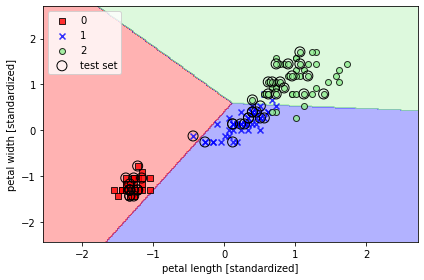

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

* 퍼셉트론 알고리즘은 선형적으로 구분되지 않은 데이터셋에는 수렴하지 못한다.

# 3.3 로지스틱 회귀를 위한 클래스 확률 모델링
* Logistic Regression - 회귀이지만 분류 모델.

### 3.3.1 로지스틱 회귀의 이해와 조건부 확률
* 이진 분류를 위한 선형 모델
* 다중 클래스
    * 다항 로지스틱 회귀(multinomial logistic regression) 또는 소프트맥스 회귀(Softmax regression)
* 오즈비(odds ratio)
    * 오즈 : 특정 이벤트가 발생활 확률
    * $=\dfrac{P}{1-P}$ , ($P$는 양성 샘플에 대한 확률)
        * 양성 샘플 : 예측하려는 대상
* 로짓(logit) 함수
    * 오즈비에 로그 함수(로그 오즈)를 취한 것
    * $logit(P)=log\dfrac{P}{1-P}$

여기서 $log$는 자연 로그를 말한다. logit 함수는 0과 1사이의 입력값을 받아 실수 범위 값으로 변환.

$0\le P \le 1$이면, $0 \le \dfrac{P}{1-P} \le \infty$이고, $-\infty \le log\dfrac{P}{1-P} \le \infty$이므로

$log\dfrac{P}{1-P}=\boldsymbol{w}^T\boldsymbol{x}$처럼 쓸 수 있다.

따라서 양성 샘플일 확률 $P = \dfrac{1}{1+e^{-\boldsymbol{w}^T\boldsymbol{x}}}=\dfrac{1}{1+e^{-z}}$


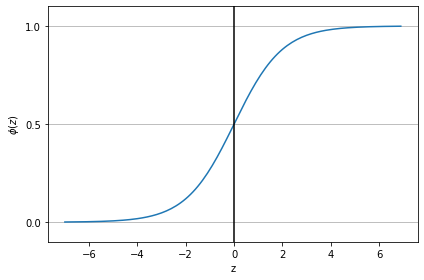

In [12]:
# 시그모이드 함수 - -7 ~ 7
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [13]:
Image(url='https://git.io/Jtm22', width=500) 

예측 확률 : $\hat{y}=\begin{cases}1&\phi(z)\ge 0.5\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\hat y=\begin{cases}1&z\ge 0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$

### 3.3.2 로지스틱 비용 함수의 가중치 학습
* 로지스틱 회귀 모델을 만들 때 최대화하려는 가능도(likelihood) $L$
* 로그를 최대화한 로그 가능도
    * $L(\boldsymbol w)=\prod^n_{i=1}\phi(z^{(i)})^{y^{(i)}}\left(1-\phi(z^{(i)})\right)^{1-y^{(i)}}$
    * 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로를 미연에 방지
    * 계수의 곱을 계수의 합으로 바꿀 수 있다.

* 경사 상승법 같은 최적화 알고리즘을 사용하여 로그 가능도 함수를 최대화 = 로지스틱 비용 함수
    * $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$

* 손실 계산
$J(\boldsymbol w)=\begin{cases}-\text{log}\phi(z)&y=1\mbox{ 일 때} \\ -\text{log}(1-\phi(z))&y=0\mbox{일 때}\end{cases}$




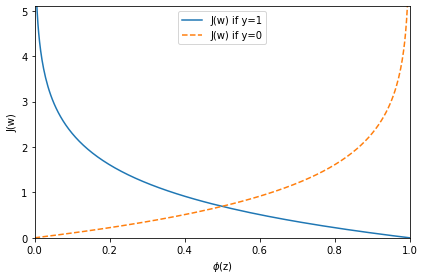

In [14]:
# 분류 비용
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* 결과 그래프
    * x축 : 0 ~ 1 범위의 시그모이드 활성화 값(시그모이드 함수의 입력인 z는 -10 ~ 10)
    * y축 : 해당하는 로지스틱 비용
    * 클래스 1에 속한 샘플의 비용은 0에 가까워지고, 클래스 0에 속한 샘플을 중 y=0로 예측하면 y축의 비용이 0에 가까워지지만, 예측이 잘못되면 비용이 무한대로 간다.
        * **잘못된 예측에 점점 더 큰 비용을 부여.**
        

### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

로지스틱 손실 함수의 미분 :

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=-\dfrac{\partial}{\partial w_j}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right] \\
&=-y^{(i)}\dfrac{\partial}{\partial w_j}\text{log}\phi(z^{(i)})-(1-y^{(i)})\dfrac{\partial}{\partial w_j}\text{log}\left(1-\phi(z^{(i)})\right) \\
&=-y^{(i)}\dfrac{1}{\phi(z^{(i)})}\dfrac{\partial}{\partial w_j}\phi(z^{(i)})+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
\end{align*}$

시그모이드 함수를 z에 대해 미분하면 : 

$\dfrac{\partial}{\partial z}\phi(z)=\dfrac{\partial}{\partial z}\left(\dfrac{1}{1+e^{-z}}\right)=-\dfrac{1}{(1+e^{-z})^2}(-e^{-z})=\dfrac{1+e^{-z}-1}{(1+e^{-z})^2}=\dfrac{1+e^{-z}}{(1+e^{-z})^2}-\dfrac{1}{(1+e^{-z})^2}=\dfrac{1}{1+e^{-z}}\left(1-\dfrac{1}{1+e^{-z}}\right)=\phi(z)(1-\phi(z))$

따라서, 

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\phi(z^{(i)})\left(1-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}z^{(i)} \\
&=\left(-y^{(i)}\left(1-\phi(z^{(i)})\right)+(1-y^{(i)})\phi(z^{(i)})\right)x_j^{(i)}\\
&=\left(-y^{(i)}+y^{(i)}\phi(z^{(i)})+\phi(z^{(i)})-y^{(i)}\phi(z^{(i)})\right)x_j^{(i)}\\
&=-\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}
\end{align*}$

* 선형 활성화 함수를 시그모이드 활성화로 바꾸고 임계 함수가 클래스 레이블 -1과 1이 아닌 0과 1을 반환하도록 변경.

In [15]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 로지스틱 비용 계산.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z): # 로지스틱 시그모이드 활성화 계산
        # from scipy.special import expit; expit(z)
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0) # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

* 위 모델은 이진 분류 문제에만 적용 가능.
    * Iris-setosa와 Iris-versicolor로만 (클래스 0과 클래스 1) 로지스틱 회귀 실행

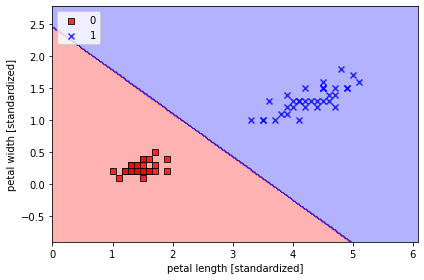

In [16]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 3.3.4 사이킷런 로지스틱 회귀 모델 훈련

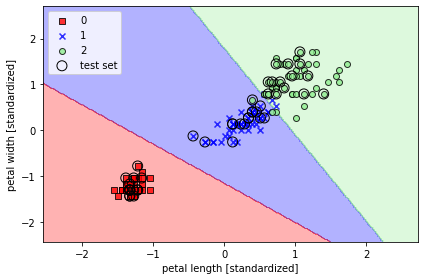

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

##### 클래스 소속 확률

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

* 각 행 : 각 index 봇꽃의 클래스 소속 활률


In [19]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

첫 번째 행에서 가장 큰 값은 대략 0.999(9.99614697e-01) => 첫 번째 샘플이 클래스 3 (Iris-virginica)에 속할 확률이 99.9%

In [20]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [21]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [22]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 3.3.5 규제를 사용하여 과대적합 피하기
* 과대적합 : 머신러닝의 학습이 훈련 데이터에만 지나치게 최적화되어, 새로운 데이터에 정확한 예측/분류를 수행하지 못하는 상태
    * 분산이 크다.
    * 모델 파라미터가 너무 많아주어진 데이터에서 너무 복잡한 모델을 만들기 때문.
* 과소적합 : 모델이 충분히 복잡하지 않아(최적화가 제대로 수행되지 않아) 데이터의 구조/패턴을 정확히 반영하지 못하는상태
    * 편향이 크다.




In [23]:
Image(url='https://git.io/Jtm2V', width=700) 

* 편향-분산 트레이드오프
    * 분산(variance) : 데이터셋 내 데이터가 얼마나 펴져 있는지를 나타내는 척도
    * 편향(bias) : 데이터가 target으로부터 떨어져 있는 정도

좋은 편향-분산 트레이드오프를 찾는 방법은 **규제(regularization)**를 사용하여 공선성(Collinearity)(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지하는 것이다.

* 규제 : 과도한 파라미터(가중치) 값을 제한하기 위해 추가적인 정보(편향)를 주입하는 개념
    * L2 규제 $\lVert\boldsymbol{w}\rVert^2_2=\sum_{j=1}^m w_j^2$
        * $\lambda$는 규제 하이퍼파라미터 이다.
    * L1 규제 $\lVert\boldsymbol{w}\rVert_1=\sum_{j=1}^m \left|w_j\right|$

`C`는 $\lambda$의 역수로 증가시키면 규제가 작아지고, 감소시키면 규제가 커짐. 기본값은 1.0

`penalty` 매개변수 기본값 `'l2'`, L1 규제를 위해 `'l1'`을 지정할 수 있음.

* 규제와 특성 정규화(normalizatio)
    * 규제는 표준화 같은 특성 스케일 조정이 중요한 또 다른 이유이다. 규제가 잘 동작하기 위해서는 모든 특성이 비슷한 스케일을 가져야 한다.

규제가 추가된 비용 함수 : $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]+\dfrac{\lambda}{2}\sum_{j=1}^m w_j^2$

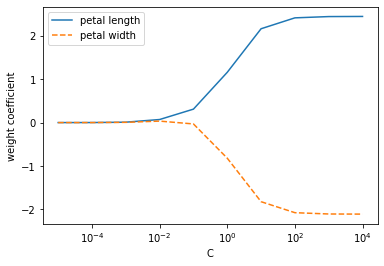

In [24]:
# 두 개의 가중치에 대해 L2 규제 효과를 그래프로 나타낸다.
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()